<IPython.core.display.Javascript object>


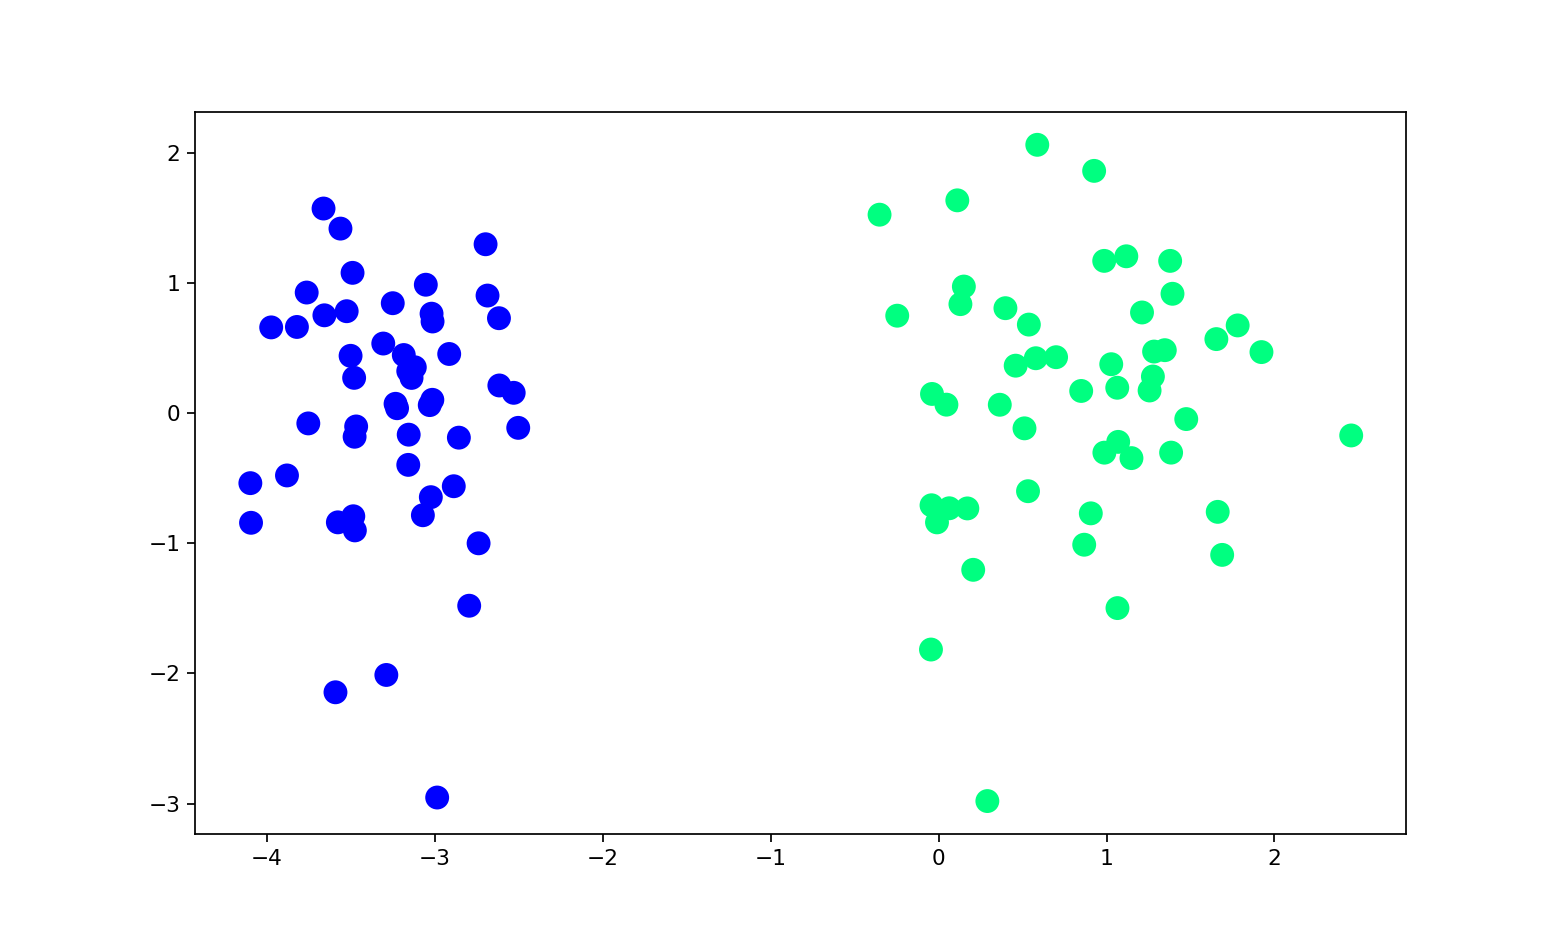

In [17]:

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)



In [18]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        
def step(z):
    return 1 if z>0 else 0


In [19]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[0.98628302 0.45500818]
1.3000000000000003


In [20]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

<IPython.core.display.Javascript object>


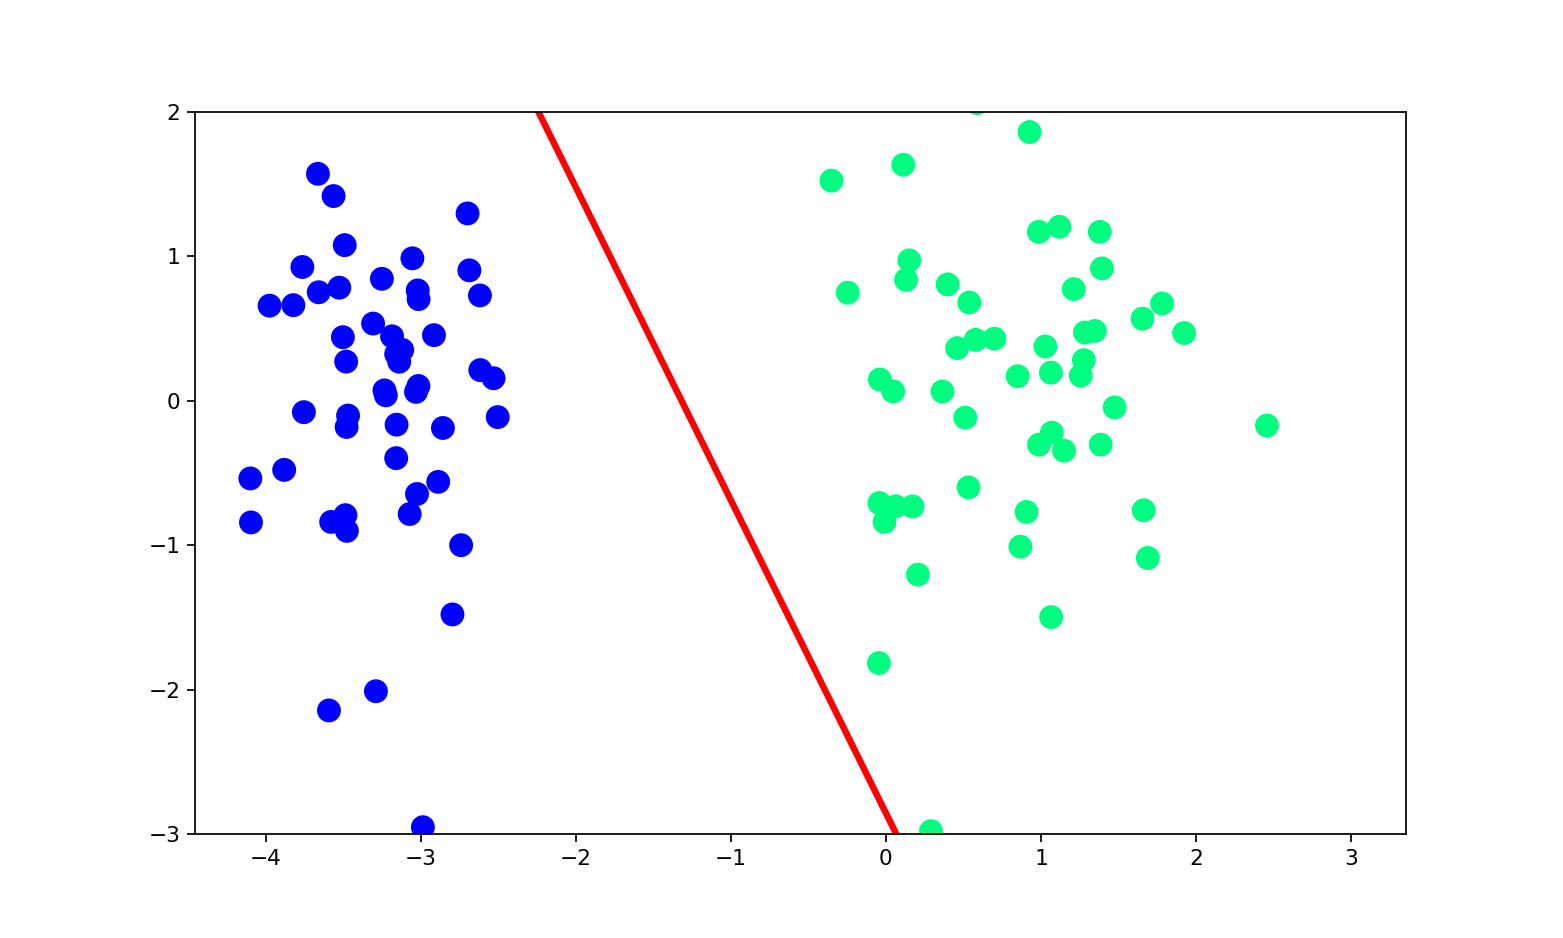

(-3.0, 2.0)

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [22]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b


In [23]:
m,b = perceptron(X,y)
%matplotlib notebook


<IPython.core.display.Javascript object>


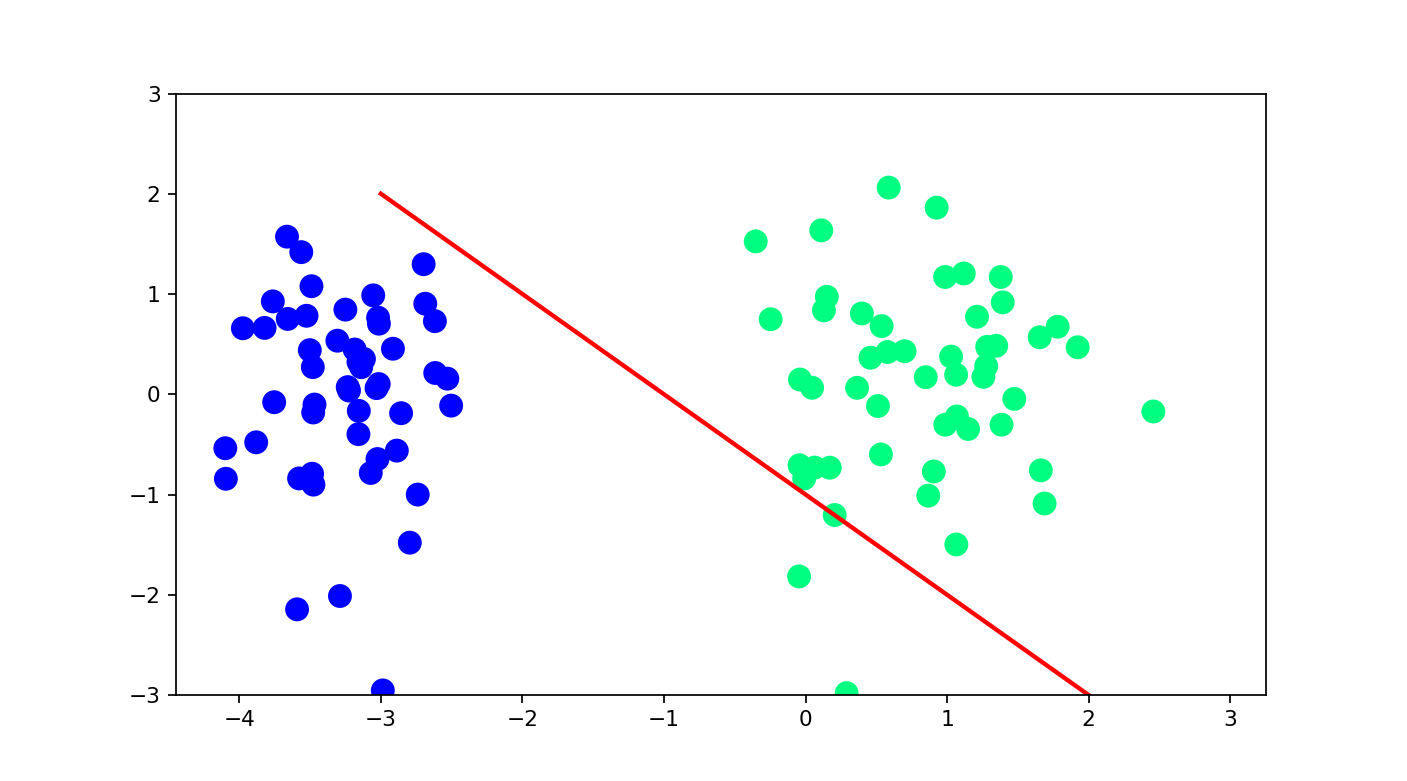

In [24]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))

In [25]:
x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)


(-3.0, 3.0)

In [26]:
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

In [27]:
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100) 

C:\Users\Aman\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lor = LogisticRegression()
lor.fit(X,y)


LogisticRegression()

In [30]:

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])


In [31]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


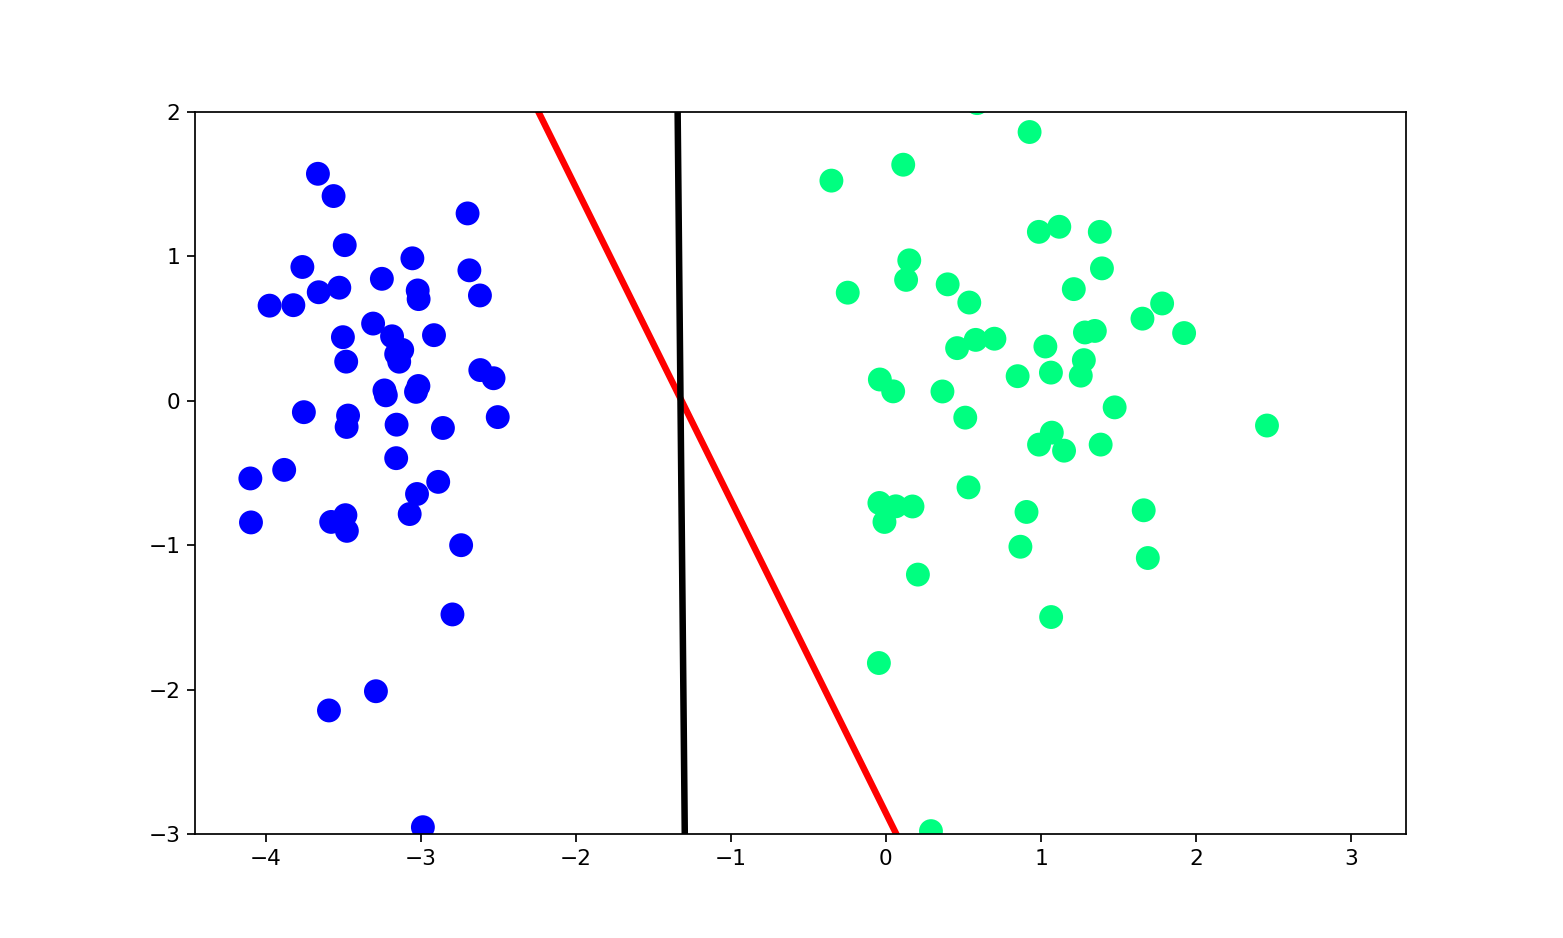

(-3.0, 2.0)

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)